## This Data is about Healthcare dataset 


# About this data : 

### Context

   The dataset can be utilized to develop predictive models or algorithms to identify
    individuals at higher risk of experiencing a stroke.
    
    
    
  - id : Computer generated patient identification number.
 
  - gender : gender type of customer.

  - age :  age of patient.
 
  - hypertension :  high blood pressure.
  
  - heart disese : refers to a range of conditions that affect the heart and blood vessels.
  
  - ever married : indicates whether an individual has ever been married or not.
  
  - work type : indicates the type of occupation or work .
  
  - Residence type :  indicates the type of residence or housing status of the individuals.
  
  - avg glucose level : represents the average glucose (blood sugar) level of the individuals.
  
  - bmi : measure that assesses body weight in relation to height.
  
  - smoking status : represents the smoking habits , provides information about the current or past smoking behavior of the individuals.
  
  - stroke : the blood supply to the brain is interrupted or reduced.

## Import Libraries 

In [283]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data  

In [284]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

### show some information about data 
- what is the shape of data
- what are types of data ?
- is there any null values ? 
- if there any duplicated values?


In [221]:
df.shape

(5110, 12)

In [222]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [224]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### If  The Null is Exist fill by mean 

In [225]:
df.fillna(df.bmi.mean(),inplace=True )

In [226]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Drop the patient id columns


In [227]:
df=df.drop("id",axis=1)

In [1]:
df.describe().style.background_gradient(cmap="tab10")

NameError: name 'df' is not defined

###  if there any duplicated values?
 

In [229]:
df.duplicated().sum()

0

### How many classes at Residence Type column ?  


In [230]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

### How many Patient at Work Type column ? 


In [231]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

### How many Patient at Smoking Status column ? 
 

In [232]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

### is femails more than males ? 
 

In [233]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

### Drop the value others  


In [234]:
df=df[df.gender!="Other"]


### is males heart disease more or femals?

In [235]:
df.groupby("gender")["heart_disease","age"].value_counts().to_frame()

C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\656602329.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("gender")["heart_disease","age"].value_counts().to_frame()


0
gender heart_disease age      
Female 0             45.00  61
                     51.00  53
                     50.00  52
                     31.00  52
                     52.00  52
...                         ..
Male   1             47.00   1
                     49.00   1
                     2.00    1
       0             0.40    1
                     0.48    1

[281 rows x 1 columns]

### is Rural heart disease more or Urban?

In [236]:
df.groupby("Residence_type")["heart_disease"].value_counts().to_frame()

heart_disease
Residence_type heart_disease               
Rural          0                       2379
               1                        134
Urban          0                       2454
               1                        142

### Find out the stroke and Residence typee of each Gender


In [237]:
df.groupby("gender")["stroke","Residence_type"].value_counts().to_frame()

C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\3766388424.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("gender")["stroke","Residence_type"].value_counts().to_frame()


0
gender stroke Residence_type      
Female 0      Urban           1452
              Rural           1401
       1      Urban             77
              Rural             64
Male   0      Urban           1009
              Rural            998
       1      Urban             58
              Rural             50

### How many patients have heart disease and hypertension ?

In [238]:
df.groupby("heart_disease")["hypertension"].value_counts().to_frame()

hypertension
heart_disease hypertension              
0             0                     4399
              1                      434
1             0                      212
              1                       64

### Give me all patient have both heart_disease values and hypertension, dave it into a variable calles heart_hyper 
### Give me all patient have both heart_disease values and stroke and save at heart_stroke
### Give me all patient have both heart_disease values , stroke and hypertension and save at heart_stroke_hyper

In [239]:
df["heart_hyper"]=df["heart_disease"]+df["hypertension"]

In [240]:
df["heart_stroke"]=df["heart_disease"]+df["stroke"]

In [241]:
df["heart_stroke_hyper"]=df["heart_disease"]+df["stroke"]+df["hypertension"]

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5109 non-null   object 
 1   age                 5109 non-null   float64
 2   hypertension        5109 non-null   int64  
 3   heart_disease       5109 non-null   int64  
 4   ever_married        5109 non-null   object 
 5   work_type           5109 non-null   object 
 6   Residence_type      5109 non-null   object 
 7   avg_glucose_level   5109 non-null   float64
 8   bmi                 5109 non-null   float64
 9   smoking_status      5109 non-null   object 
 10  stroke              5109 non-null   int64  
 11  heart_hyper         5109 non-null   int64  
 12  heart_stroke        5109 non-null   int64  
 13  heart_stroke_hyper  5109 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 598.7+ KB


### How many Patients have Heart _ Hyper,Heart _ Stroke and heart_stroke_hyper  ?

In [243]:
df["heart_hyper"].value_counts()

0    4399
1     646
2      64
Name: heart_hyper, dtype: int64

In [244]:
df["heart_stroke"].value_counts()

0    4631
1     431
2      47
Name: heart_stroke, dtype: int64

In [245]:
df["heart_stroke_hyper"].value_counts()

0    4250
1     708
2     138
3      13
Name: heart_stroke_hyper, dtype: int64

### The values must be 0 or 1  in heart_stroke , heart_hyper and heart_stroke_hyper.

In [246]:
df.heart_hyper[df.heart_hyper == 1] = 0 
df.heart_hyper[df.heart_hyper == 2]   = 1


C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\3489220799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_hyper[df.heart_hyper == 1] = 0
C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\3489220799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_hyper[df.heart_hyper == 2]   = 1


In [247]:
df.heart_stroke[df.heart_stroke == 1] = 0 
df.heart_stroke[df.heart_stroke == 2]   = 1


C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\3629793731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_stroke[df.heart_stroke == 1] = 0
C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\3629793731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_stroke[df.heart_stroke == 2]   = 1


In [248]:
df.heart_stroke_hyper[df.heart_stroke_hyper == 1] = 0 
df.heart_stroke_hyper[df.heart_stroke_hyper == 2]   = 0
df.heart_stroke_hyper[df.heart_stroke_hyper == 3] = 1 


C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\1695015800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_stroke_hyper[df.heart_stroke_hyper == 1] = 0
C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\1695015800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_stroke_hyper[df.heart_stroke_hyper == 2]   = 0
C:\Users\AhmedElSany\AppData\Local\Temp\ipykernel_4740\1695015800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [249]:
df["heart_stroke"].value_counts()

0    5062
1      47
Name: heart_stroke, dtype: int64

In [250]:
df["heart_hyper"].value_counts()

0    5045
1      64
Name: heart_hyper, dtype: int64

In [251]:
df["heart_stroke_hyper"].value_counts()

0    5096
1      13
Name: heart_stroke_hyper, dtype: int64

### Encoding Married 

In [252]:
#encoding married 
df.ever_married=df.ever_married.replace("Yes","1")
df.ever_married=df.ever_married.replace("No","0")


In [253]:
df.ever_married.value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

### Visualize the work type Duration Smoking status 

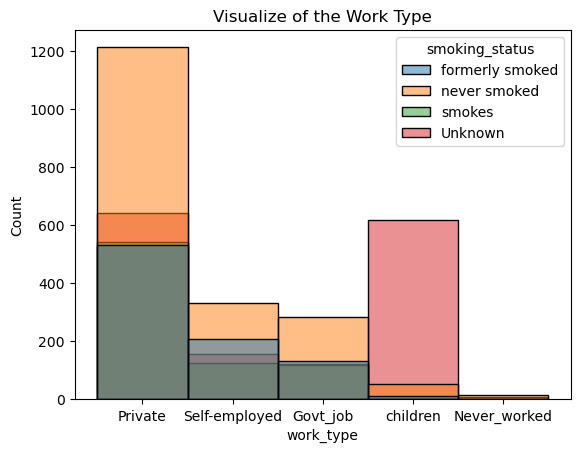

In [254]:
sns.histplot(data =df, x ="work_type",hue ="smoking_status"  )
plt.title("Visualize of the Work Type")
plt.show()

### Distribution of the Gender With Smoking Status

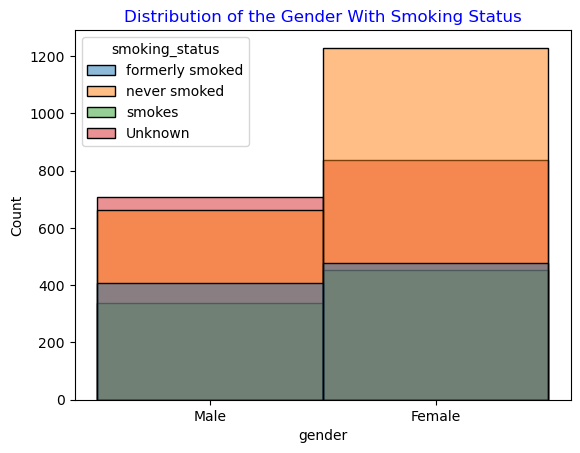

In [255]:
sns.histplot(data =df, x ="gender",hue ="smoking_status"  )
plt.title("Distribution of the Gender With Smoking Status",color="b")
plt.show()

### Distribution the Ever Married With Hypertension

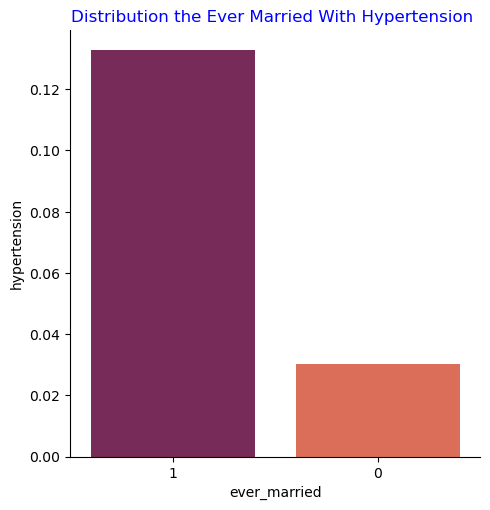

In [256]:
sns.catplot(y='hypertension', x='ever_married', data=df, kind='bar',ci=None,palette= "rocket");
plt.title("Distribution the Ever Married With Hypertension ",color ="b")
plt.show()

### Visualize the Age With BMI During Gender

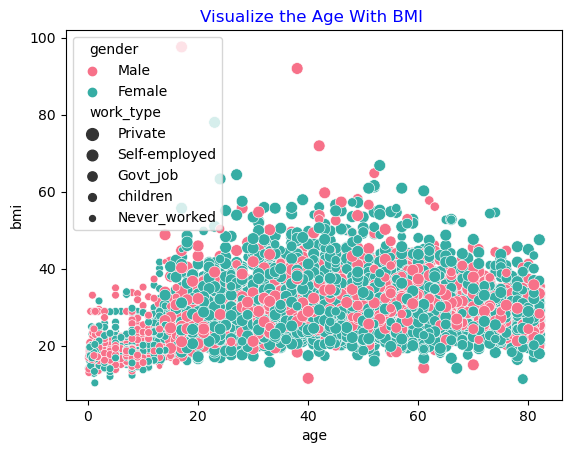

In [257]:
sns.scatterplot(x='age', y='bmi', data=df,palette= "husl",hue="gender",size="work_type");
plt.title("Visualize the Age With BMI ",color ="b")
plt.show()

### Visualize the Correlation Map

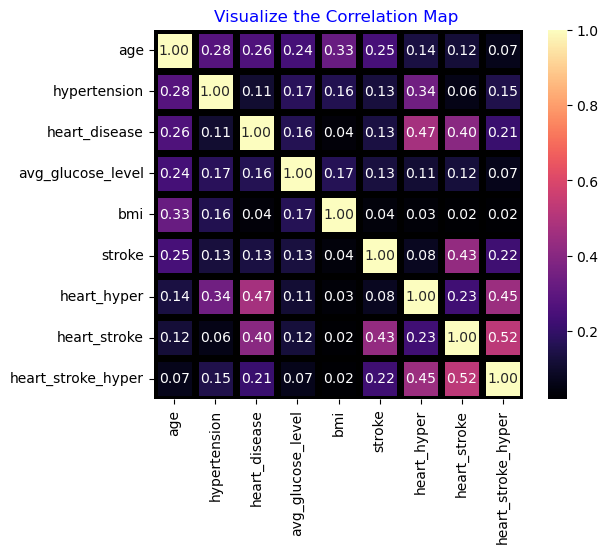

In [258]:
sns.heatmap(df.corr(),cmap='magma', linewidth=5,linecolor='black', square=True,annot=True,fmt='.2f')
plt.title("Visualize the Correlation Map ",color ="b")
plt.show()
# cmap=Blues

### Visualize of the Work type With BMI During Gender 

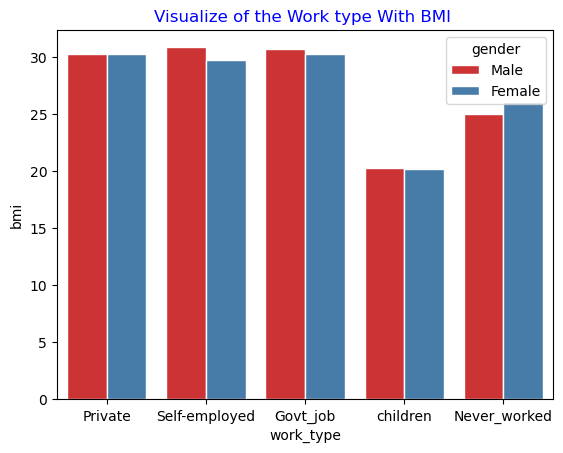

In [259]:
sns.barplot(x="work_type" , y ="bmi" ,data = df,ci=None,hue = "gender",palette="Set1",ec='w')
plt.title("Visualize of the Work type With BMI ",color ="b")
plt.show()
# //bone

### Distribution of the Smoking Status

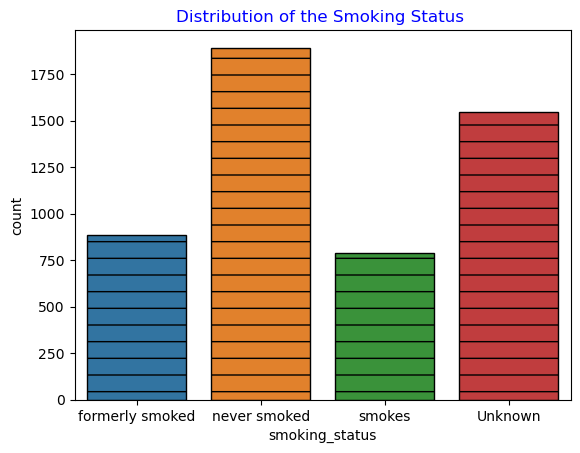

In [260]:
sns.countplot(x="smoking_status" ,data = df,palette='tab10',ec='black', hatch='-')
plt.title("Distribution of the Smoking Status ",color ="b")
plt.show()

### Visualize of BMI and Gvg Glucose Level 

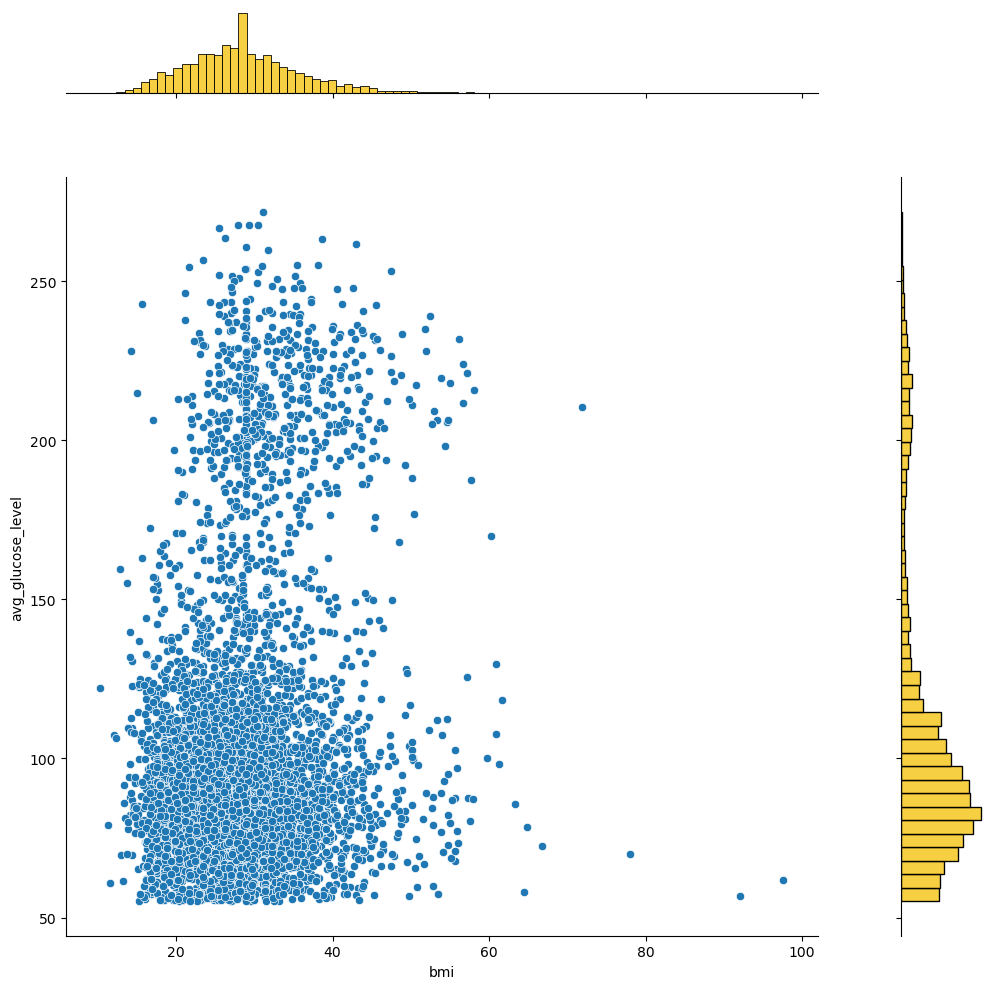

In [261]:
sns.jointplot(x='bmi', y='avg_glucose_level' 
              , data = df,kind = 'scatter'
              ,height=10,space=1
              , marginal_kws={'color': 'xkcd:golden'});


### Creat boxpolt for Age and Smoking status on Gender

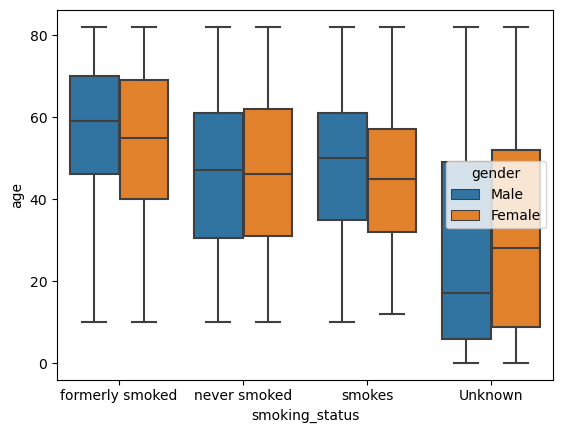

In [262]:
sns.boxplot(y='age',x="smoking_status",hue ="gender" , data = df);


### Creat barpolt for Age and heart_stroke_hyper by Gender

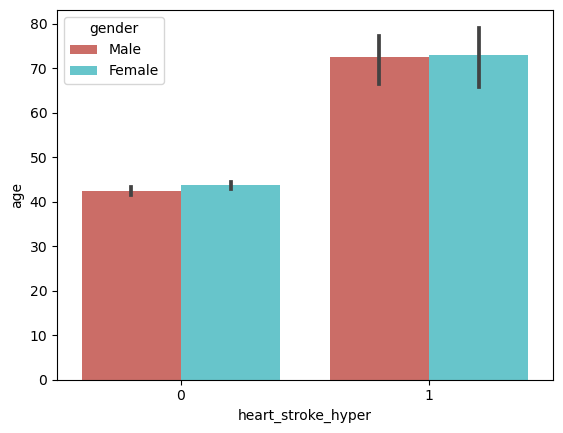

In [263]:
sns.barplot(y='age',x="heart_stroke_hyper" , data = df,hue ="gender",palette="hls");

### Creat regpolt for Age and hypertension

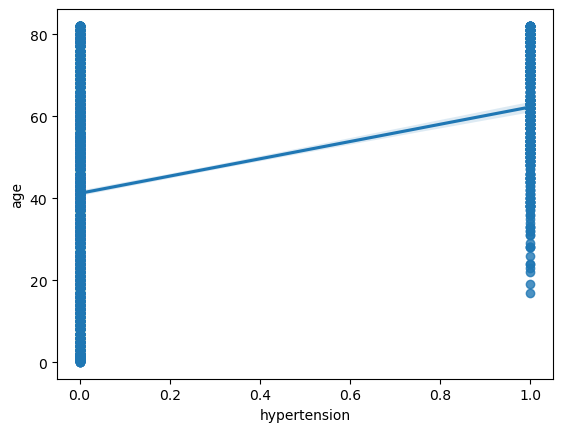

In [264]:
sns.regplot(y='age',x="hypertension" , data = df);